### import necessary modules

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### load the image

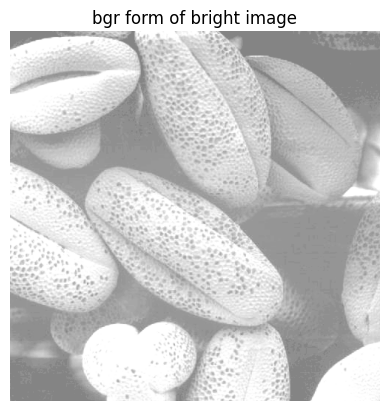

shape of the image: (500, 500, 3)


In [23]:
input_image = cv2.imread('Images/seedsBright.tif')
# input_image = np.array(input_image)
# input_image.astype(float)

plt.imshow(input_image)
plt.axis('off')
plt.title('bgr form of bright image')
plt.show()

print(f"shape of the image: {input_image.shape}")

### convert the BGR to RGB

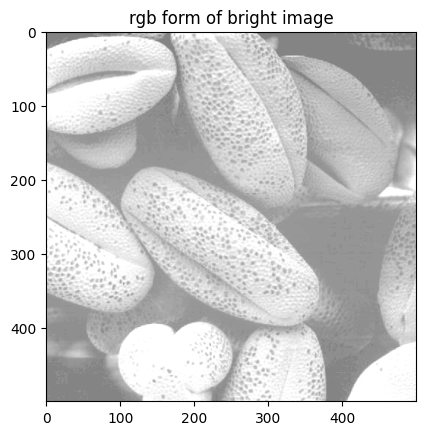

shape of the image: (500, 500, 3)


In [72]:
rgb_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.title('rgb form of bright image')
plt.show()
print(f"shape of the image: {rgb_image.shape}")

### convert the RGB to GRAY

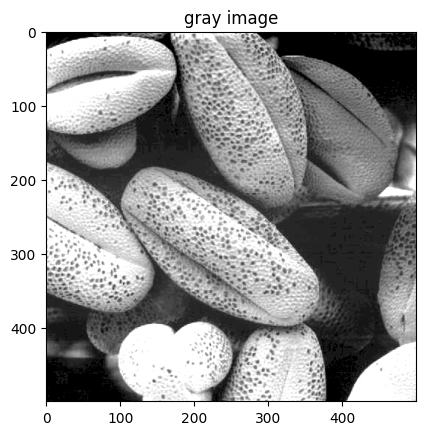

shape of the image: (500, 500)


In [73]:
gray_image = cv2.cvtColor(rgb_image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image,cmap='gray')
plt.title('gray image')
plt.show()

print(f"shape of the image: {gray_image.shape}")


### calculating Histogram

In [74]:
def imhist(image):
    hist = np.zeros(256)
    for i in range(256):
        hist[i] = sum(sum(image == i))
        
    return hist    

### histogram ploting

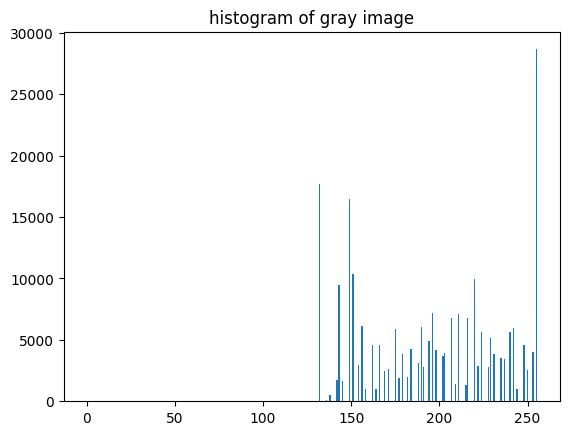

In [75]:
#ploting histogram 
x = np.arange(256)
gray_image_hist = imhist(gray_image)

plt.bar(x,gray_image_hist)
plt.title('histogram of gray image')
plt.show()

### calculate probability density function 

In [76]:
pdf_function = np.zeros(256) #each index is probabilty of that intensity of the image

for i in range(0,256):
    pdf_function[i] = gray_image_hist[i]/(gray_image.shape[0]*gray_image.shape[1])
    
    

### calculate the cummulative density function

In [77]:
cdf_function = np.zeros(256)
cdf_function[0] = pdf_function[0]; #initial cdf value
for i in range(256):
    cdf_function[i] = cdf_function[i-1] + ((256-1)*pdf_function[i]) #intensity level=256
    
    
cdf_function = np.round(cdf_function)
print(cdf_function)    
print(f"length of the cdf_function: {len(cdf_function)}")    
    
    

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  18.  18.  18.  18.  18.  18.  19.  19.
  19.  19.  20.  30.  30.  32.  32.  32.  32.  49.  49.  59.  59.  59.
  62.  62.  68.  68.  69.  69.  69.  69.  74.  74.  75.  75.  80.  80.
  80.  82.  82.  85.  85.  85.  85.  91.  91.  93.  93.  97.  97.  97.
  99.  99. 103. 103. 103. 103. 106. 106. 112. 115. 115. 115. 120. 120.
 128. 

### cdf is also called the Transformation function

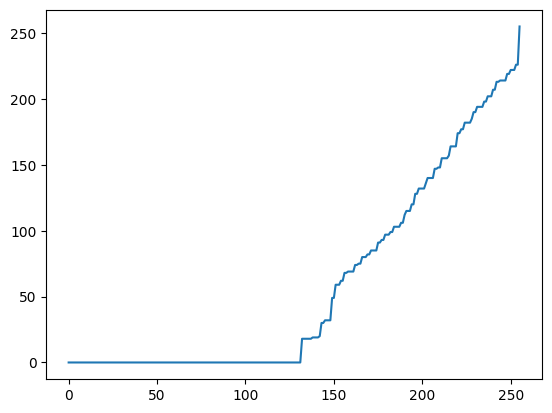

In [78]:
plt.plot(cdf_function)

### print the pixel value of gray image

In [79]:
print(gray_image)

[[132 132 132 ... 191 191 184]
 [132 132 132 ... 190 190 179]
 [132 132 132 ... 175 175 166]
 ...
 [149 132 132 ... 248 242 242]
 [151 138 132 ... 242 242 235]
 [156 145 132 ... 240 240 224]]


### map the new intensity 

In [80]:
equalize_image = gray_image

#now mapping the intensity level
for i in range(256):
    equalize_image[gray_image==i] = cdf_function[i]
    
 


### ploting the gray image after equalization histogram

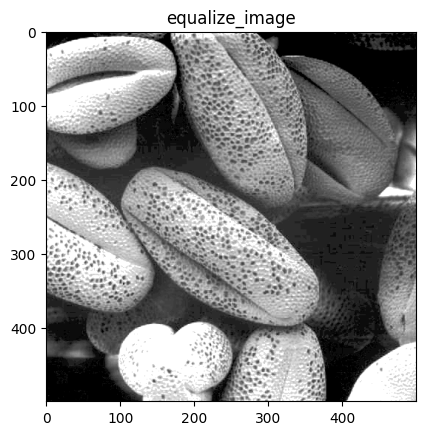

In [81]:
plt.imshow(equalize_image,cmap='gray')
plt.title('equalize_image')
plt.show()

### equalization image histogram 

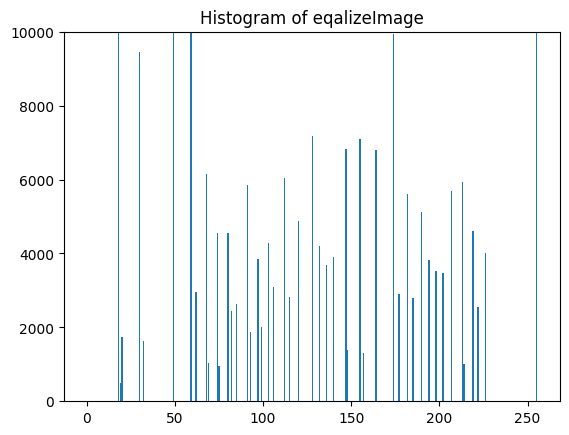

In [ ]:
equalize_image_hist = imhist(equalize_image)
plt.bar(x,equalize_image_hist)
plt.ylim(0,10000)
plt.title('Histogram of eqalizeImage')
plt.show()


### ploting ...

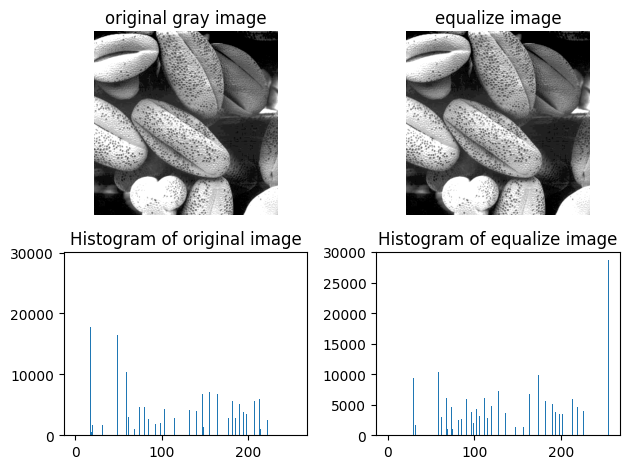

In [83]:

plt.subplot(2,2,1)
plt.imshow(gray_image,cmap='gray')
plt.title('original gray image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(equalize_image,cmap='gray')
plt.title('equalize image')
plt.axis('off')

plt.subplot(2,2,3)
plt.bar(np.arange(256),imhist(gray_image))
plt.title('Histogram of original image')


plt.subplot(2,2,4)
plt.bar(np.arange(256),imhist(equalize_image))
plt.ylim(0,30000)
plt.title('Histogram of equalize image')


plt.tight_layout()
plt.show()

### image histogram equalization using built in function

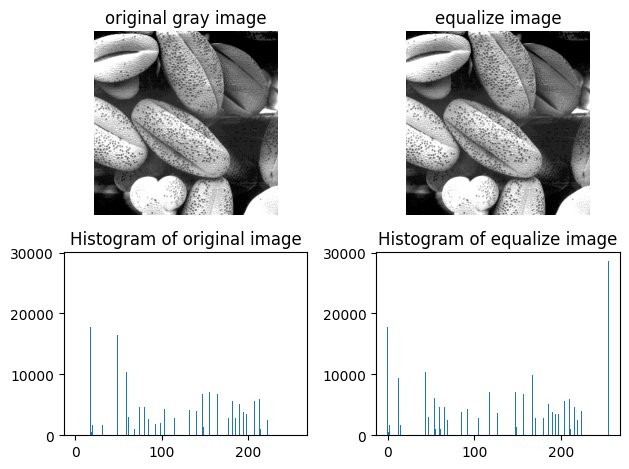

In [84]:
equalize_image_built = cv2.equalizeHist(gray_image)

plt.subplot(2,2,1)
plt.imshow(gray_image,cmap='gray')
plt.title('original gray image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(equalize_image_built,cmap='gray')
plt.title('equalize image')
plt.axis('off')

plt.subplot(2,2,3)
plt.bar(np.arange(256),imhist(gray_image))
plt.title('Histogram of original image')


plt.subplot(2,2,4)
plt.bar(np.arange(256),imhist(equalize_image_built))
plt.title('Histogram of equalize image')


plt.tight_layout()
plt.show()

In [85]:
print(equalize_image[0][:100])
print(equalize_image_built[0][:100])

[ 18  18  18  18  18  18  18  18  18  18  18  18  18  18  18  18  18  18
  18  18  18  18  18  18  18  18  18  18  18  18  18  18  18  18  18  18
  18  18  18  18  18  18  18  18  18  18  18  18  18  18  18  18  18  18
  18  18  18  30  49  18  18  20  30  49  49  20  18  18  18  18  18  18
  18  18  18  18  18  30  30  20  20  59  80  85  85  80  80  80  91  93
  91  80  75  91 103 112  97  93  85  80]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  13  33   0   0   2  13  33  33   2   0   0   0   0   0   0
   0   0   0   0   0  13  13   2   2  44  66  72  72  66  66  66  78  80
  78  66  61  78  92 102  85  80  72  66]
